In [1]:
#Download dataset from webpage
import wget
URL = "http://ovne.org/download/housing_price.csv"
response = wget.download(URL, "housing_price.csv")

100% [..............................................................................] 73526 / 73526

In [2]:
# import all packages needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read and prepare dataset
df = pd.read_csv("housing_price.csv", header = 0, na_values ="NA",  comment ='\t', sep=',', skipinitialspace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [4]:
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


LotArea: Lot size in square feet
YearBuilt: Original construction date
TotalBsmtSF: Total square feet of basement area
1stFlrSF:  First Floor square feet
2ndFlrSF: Second floor square feet
FullBath: Full bathrooms above grade
BedroomAbvGr: Number of bedrooms above basement level
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
GarageArea	: Size of garage in square feet
GrLivArea: Above grade (ground) living area square feet
MSSubClass: The building class
OverallCond: Overall condition rating

In [5]:
# Creat the feature input X and target variable Y
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
# import the decision tree regression 
from sklearn import tree 
 
# create a regressor object
reg = tree.DecisionTreeRegressor(max_depth = 3, random_state =0)

# fit the regressor with X_train and y_train data
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [8]:
# Test trained model with test set
y_pred = reg.predict(X_test)

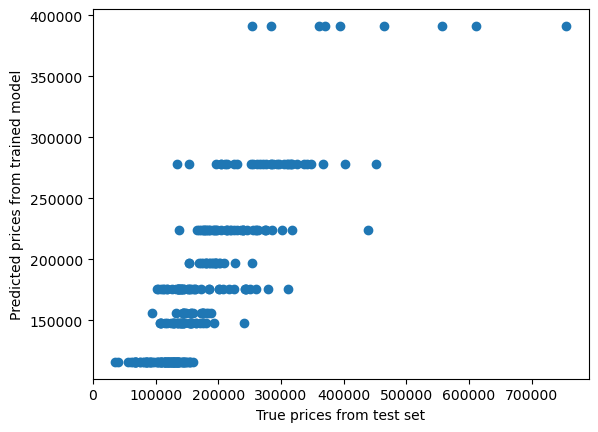

In [9]:
# scatter plot for original data
plt.scatter(y_test, y_pred)
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error as MAE
err = MAE(y_test, y_pred)
print("Mean absolute error of test set is: ", err)

Mean absolute error of test set is:  33615.65025524834


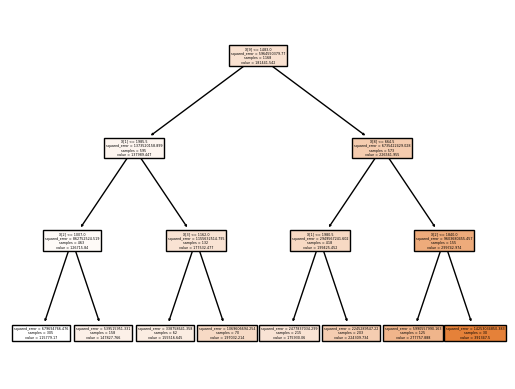

In [11]:
#from sklearn import tree
tree.plot_tree(reg, filled = True)
plt.savefig('out.pdf')
plt.show()

In [12]:
feat_importance = reg.feature_importances_

In [13]:
print("feat importance = " + str(feat_importance))

feat importance = [0.         0.11547937 0.09495624 0.01284048 0.         0.
 0.         0.         0.25784009 0.51888381 0.         0.        ]


<AxesSubplot:>

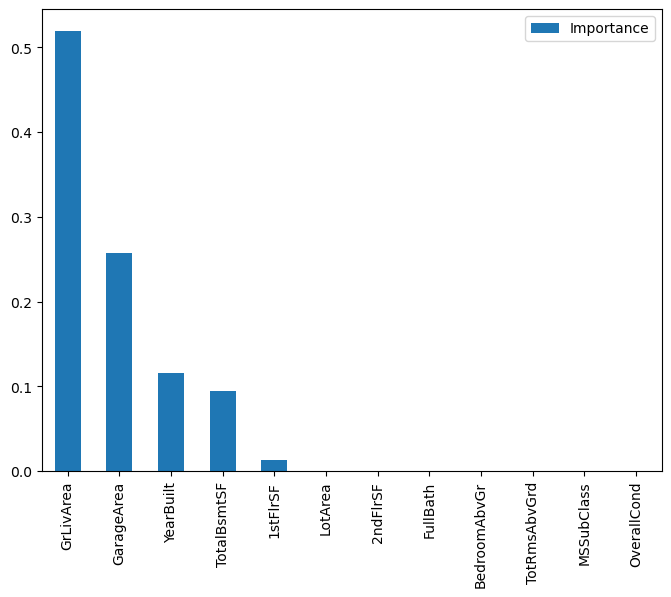

In [14]:
feat_importances = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [15]:
train_err = []
test_err =[]
for depth in range(1,10):
    reg = tree.DecisionTreeRegressor(max_depth = depth, random_state =0)
    reg.fit(X_train, y_train)
    #compute prices Y_pred from training set X_train
    y_train_pred = reg.predict(X_train)
    #compute prices y_pred from test set x_test
    y_pred = reg.predict(X_test)
    train_err.append(MAE(y_train,y_train_pred))
    test_err.append(MAE(y_test,y_pred))

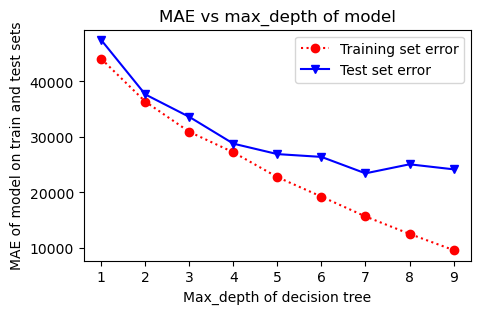

In [16]:
import numpy as np
x = np.linspace(1,9,9)
fig,ax = plt.subplots(figsize = (5, 3))
ax.plot(x, train_err, "o:r", label = "Training set error")
ax.plot(x,test_err,"v-b", label = "Test set error")
ax.set_xlabel("Max_depth of decision tree")
ax.set_ylabel("MAE of model on train and test sets")
ax.set_title("MAE vs max_depth of model")
ax.legend()
plt.show()

## Classification decision trees 

In [17]:
#reg = tree.DecisionTreeRegressor(max_depth = 3, random_state =0)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state =0)

#replacing reg by clf at all codes
#changing evaluation metrics (MAE) by accuracy_score(ytest, y_pred)

#using datsset iris

In [18]:
import wget
URL = "http://ovne.org/download/iris_dataset.csv"
response = wget.download(URL, "iris_dataset.csv")

100% [................................................................................] 4620 / 4620

In [19]:
import pandas as pd
df = pd.read_csv("iris_dataset.csv", header = 0, na_values ="NA",  comment ='\t', sep=',', skipinitialspace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
